##  Covid-19 Data Analysis 

In [6]:
# Importing the needed modules
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


## Task 2

### Task 2.1: Importing Covid-19 Dataset
importing "time_series_covid19_confirmed_global.csv" from "./datasets" folder. 

In [7]:
corona_dataset_csv = pd.read_csv("datasets/time_series_covid19_confirmed_global.csv")
corona_dataset_csv.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,989,1005,1005,1024,1024,1045,1045,1045,1060,1060
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,93,93,93,94,94,94,94,94,94,94
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,294569,299126,305966,312659,320884,329043,336802,342154,350867,359638
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,41663,41701,41846,42056,42319,42477,42616,42792,42825,42936
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,3,4,...,3957,3959,3966,3971,3972,3981,3985,3988,3991,3997


#### Let's check the shape of the dataframe

In [3]:
corona_dataset_csv.shape

(266, 221)

### Task 2.2: Delete the useless columns

In [4]:
# Axis = 0 is the default value, axis 0 is the X-axis while axis 1 is the Y-axis
# inplace=True to apply the change directly and store it in the same value
# .drop is to remove the unwanted columns
corona_dataset_csv.drop(["Lat","Long"],axis=1,inplace=True)

In [5]:
corona_dataset_csv.head(10)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070
1,NaN,Albania,0,0,0,0,0,0,0,0,...,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,989,1005,1005,1024,1024,1045,1045,1045,1060,1060
4,NaN,Angola,0,0,0,0,0,0,0,0,...,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283
5,NaN,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,93,93,93,94,94,94,94,94,94,94
6,NaN,Argentina,0,0,0,0,0,0,0,0,...,294569,299126,305966,312659,320884,329043,336802,342154,350867,359638
7,NaN,Armenia,0,0,0,0,0,0,0,0,...,41663,41701,41846,42056,42319,42477,42616,42792,42825,42936
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113
9,New South Wales,Australia,0,0,0,0,3,4,4,4,...,3957,3959,3966,3971,3972,3981,3985,3988,3991,3997


### Task 2.3: Aggregating the rows by the country

In [6]:
# Aggregating with Country as the START, instead of numbers and sum is used to aggregate all of them not just one
corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum()

In [7]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070
Albania,0,0,0,0,0,0,0,0,0,0,...,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759
Algeria,0,0,0,0,0,0,0,0,0,0,...,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228
Andorra,0,0,0,0,0,0,0,0,0,0,...,989,1005,1005,1024,1024,1045,1045,1045,1060,1060
Angola,0,0,0,0,0,0,0,0,0,0,...,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283


In [8]:
corona_dataset_aggregated.shape

(188, 217)

### Task 2.4: Visualizing data related to a country for example China
visualization always helps for better understanding of our data.

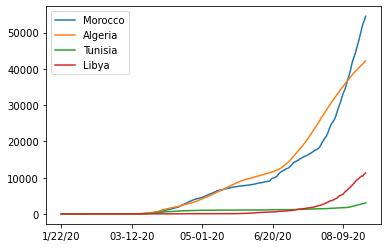

In [9]:
#corona_dataset_aggregated.loc["China"].plot()
#corona_dataset_aggregated.loc["Italy"].plot()
#corona_dataset_aggregated.loc["Turkey"].plot()
#corona_dataset_aggregated.loc["Spain"].plot()
#corona_dataset_aggregated.loc["Mauritania"].plot()
corona_dataset_aggregated.loc["Morocco"].plot()
corona_dataset_aggregated.loc["Algeria"].plot()
corona_dataset_aggregated.loc["Tunisia"].plot()
corona_dataset_aggregated.loc["Libya"].plot()
#corona_dataset_aggregated.loc["US"].plot()
#corona_dataset_aggregated.loc["Egypt"].plot()
#corona_dataset_aggregated.loc["Sudan"].plot()
# To cleariify which colour belongs to which country
plt.legend()

### Covid-19 Cases in North Africa

<AxesSubplot:>

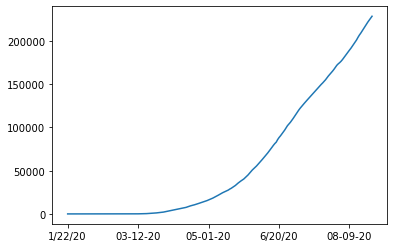

In [10]:
North_Africa_Region = corona_dataset_aggregated.loc["Morocco"]+corona_dataset_aggregated.loc["Algeria"]+corona_dataset_aggregated.loc["Tunisia"]+corona_dataset_aggregated.loc["Libya"]+corona_dataset_aggregated.loc["Mauritania"]+corona_dataset_aggregated.loc["Egypt"]+corona_dataset_aggregated.loc["Sudan"]
North_Africa_Region.plot()

### Task3: Calculating a good measure 
we need to find a good measure reperestend as a number, describing the spread of the virus in a country. 

<AxesSubplot:>

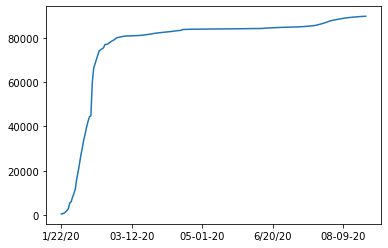

In [11]:
corona_dataset_aggregated.loc["China"].plot()

<AxesSubplot:>

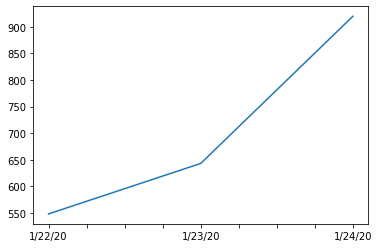

In [12]:
corona_dataset_aggregated.loc["China"][:3].plot()

### task 3.1: caculating the first derivative of the curve

<AxesSubplot:>

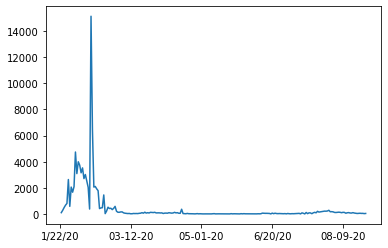

In [13]:
corona_dataset_aggregated.loc["China"].diff().plot()

### task 3.2: find maximum infection rate for China

In [14]:
corona_dataset_aggregated.loc["China"].diff().max()

15136.0

In [15]:
corona_dataset_aggregated.loc["Libya"].diff().max()

572.0

In [16]:
corona_dataset_aggregated.loc["Tunisia"].diff().max()

176.0

In [17]:
corona_dataset_aggregated.loc["Algeria"].diff().max()

675.0

In [18]:
corona_dataset_aggregated.loc["Morocco"].diff().max()

1776.0

### Task 3.3: find maximum infection rate for all of the countries

In [19]:
countries = list(corona_dataset_aggregated.index)
max_infection_rate = []
for c in countries:
    max_infection_rate.append(corona_dataset_aggregated.loc[c].diff().max())
corona_dataset_aggregated["Max Infection Rate"] = max_infection_rate

In [20]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,Max Infection Rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,37599,37599,37599,37856,37894,37953,37999,38054,38070,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,7499,7654,7812,7967,8119,8275,8427,8605,8759,178.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,39025,39444,39847,40258,40667,41068,41460,41858,42228,675.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,1005,1005,1024,1024,1045,1045,1045,1060,1060,79.0
Angola,0,0,0,0,0,0,0,0,0,0,...,1935,1966,2015,2044,2068,2134,2171,2222,2283,100.0


### Task 3.4: Create a new dataframe with only needed column

In [21]:
corona_data = pd.DataFrame(corona_dataset_aggregated["Max Infection Rate"])

In [22]:
corona_data.head()

,Max Infection Rate
Country/Region,
Afghanistan,915.0
Albania,178.0
Algeria,675.0
Andorra,79.0
Angola,100.0


### Task 4: 
- Importing the WorldHappinessReport.csv dataset
- selecting needed columns for our analysis 
- join the datasets 
- calculate the correlations as the result of our analysis

In [23]:
happiness_report_csv = pd.read_csv("Datasets/2019.csv")

In [24]:
happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Task 4.2: let's drop the useless columns

In [25]:
useless_columns = ["Overall rank", "Score", "Generosity", "Perceptions of corruption"]

In [26]:
happiness_report_csv.drop(useless_columns, axis=1, inplace=True)
happiness_report_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


### Task 4.3: Changing the indices of the dataframe

In [27]:
happiness_report_csv.set_index("Country or region", inplace=True)

In [28]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


### Task 4.4: join the two datasets that we prapared

#### Corona Dataset:

In [29]:
corona_data.head()

,Max Infection Rate
Country/Region,
Afghanistan,915.0
Albania,178.0
Algeria,675.0
Andorra,79.0
Angola,100.0


In [30]:
corona_data.shape

(188, 1)

#### World Happiness Dataset:

In [31]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [32]:
happiness_report_csv.shape

(156, 4)

In [33]:
data = corona_data.join(happiness_report_csv, how="inner")

In [34]:
data.head(10)

,Max Infection Rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,0.350,0.517,0.361,0.000
Albania,178.0,0.947,0.848,0.874,0.383
Algeria,675.0,1.002,1.160,0.785,0.086
Argentina,8771.0,1.092,1.432,0.881,0.471
Armenia,771.0,0.850,1.055,0.815,0.283
Australia,716.0,1.372,1.548,1.036,0.557
Austria,1321.0,1.376,1.475,1.016,0.532
Azerbaijan,590.0,1.043,1.147,0.769,0.351
Bahrain,786.0,1.362,1.368,0.871,0.536
Bangladesh,4019.0,0.562,0.928,0.723,0.527


### Task 4.5: Correlation Matrix

In [35]:
data.corr()

,Max Infection Rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Max Infection Rate,1.000000,0.104200,0.072464,0.096767,0.085972
GDP per capita,0.104200,1.000000,0.757521,0.859431,0.394799
Social support,0.072464,0.757521,1.000000,0.751632,0.456317
Healthy life expectancy,0.096767,0.859431,0.751632,1.000000,0.423146
Freedom to make life choices,0.085972,0.394799,0.456317,0.423146,1.000000


### Task 5: Visualization of the results
our Analysis is not finished unless we visualize the results in terms figures and graphs so that everyone can understand what you get out of our analysis

In [36]:
data.head()

,Max Infection Rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,0.350,0.517,0.361,0.000
Albania,178.0,0.947,0.848,0.874,0.383
Algeria,675.0,1.002,1.160,0.785,0.086
Argentina,8771.0,1.092,1.432,0.881,0.471
Armenia,771.0,0.850,1.055,0.815,0.283


### Task 5.1: Plotting GDP vs Maximum Infection Rate

C:\Users\elkha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='Max Infection Rate'>

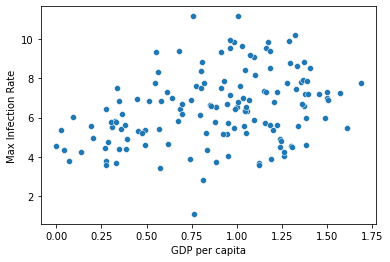

In [37]:
x = data["GDP per capita"]
y = data["Max Infection Rate"]
# Infection rate number is high so we used np.log to make more understandable graph
d = np.log(y)
# For analysis with dots using the seaborn library
sns.scatterplot(x, d)

C:\Users\elkha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='Max Infection Rate'>

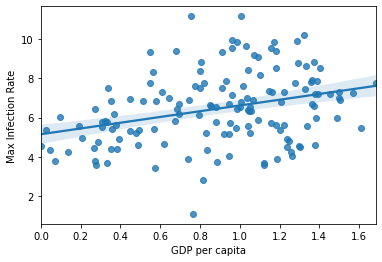

In [38]:
# for analysis with dots and a line to make it clearer
sns.regplot(x, d)

### Task 5.2: Plotting Social Support vs Maximum Infection Rate

C:\Users\elkha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Social support', ylabel='Max Infection Rate'>

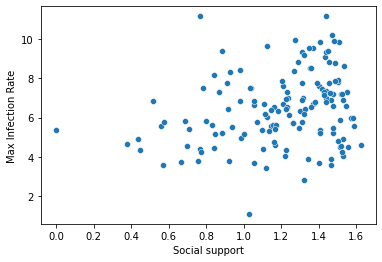

In [39]:
s = data["Social support"]
sns.scatterplot(s, d)

C:\Users\elkha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Social support', ylabel='Max Infection Rate'>

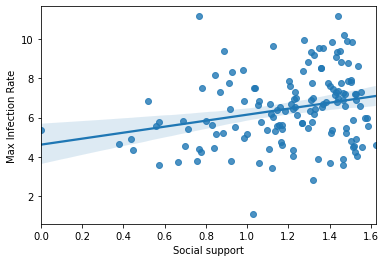

In [40]:
sns.regplot(s, d)

### Task 5.3: Plotting Healthy life expectancy vs Maximum Infection Rate

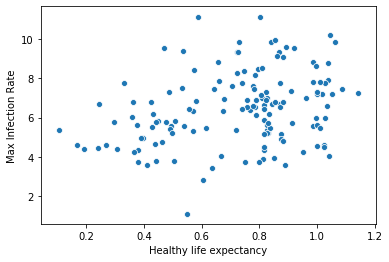

In [70]:
h = data["Healthy life expectancy"]
sns.scatterplot(h, d)

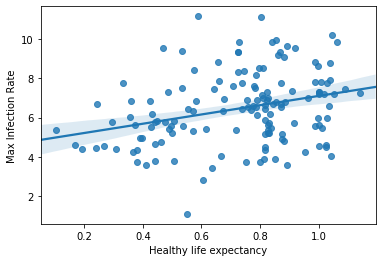

In [71]:
sns.regplot(h, d)

### Task 5.3: Plotting Freedom to make life choices vs Maximum Infection Rate

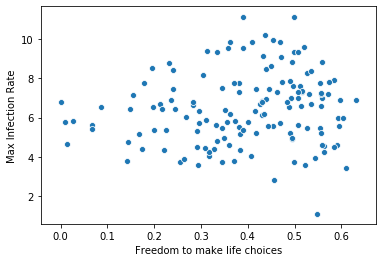

In [72]:
f = data["Freedom to make life choices"]
sns.scatterplot(f, d)

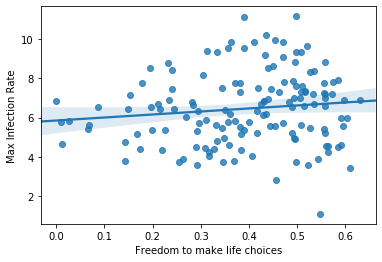

In [73]:
sns.regplot(f, d)